In [1]:
import pandas as pd
merged_df = pd.read_csv("output2.csv")

In [2]:
merged_df.shape
merged_df.columns

Index(['Unnamed: 0', 'datetime', 'PM10', 'PM2_5', 'NITROGEN_DIOXIDE',
       'SULPHUR_DIOXIDE', 'OZONE', 'CARBON_MONOXIDE', 'T2M', 'RH2M', 'WS2M',
       'WD2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN'],
      dtype='object')

In [ ]:
missing_pct = merged_df.isna().mean().sort_values(ascending=False)
missing_pct

Unnamed: 0           0.0
datetime             0.0
PM10                 0.0
PM2_5                0.0
NITROGEN_DIOXIDE     0.0
SULPHUR_DIOXIDE      0.0
OZONE                0.0
CARBON_MONOXIDE      0.0
T2M                  0.0
RH2M                 0.0
WS2M                 0.0
WD2M                 0.0
PRECTOTCORR          0.0
ALLSKY_SFC_SW_DWN    0.0
dtype: float64

In [7]:
merged_df["PM2_5"].describe(percentiles=[0.5, 0.75, 0.9, 0.95])


count    8856.000000
mean       99.624571
std        52.062784
min         0.200000
50%        90.300000
75%       127.100000
90%       169.500000
95%       201.600000
max       369.700000
Name: PM2_5, dtype: float64

<Axes: title={'center': 'Average PM2.5 by Hour'}, xlabel='hour'>

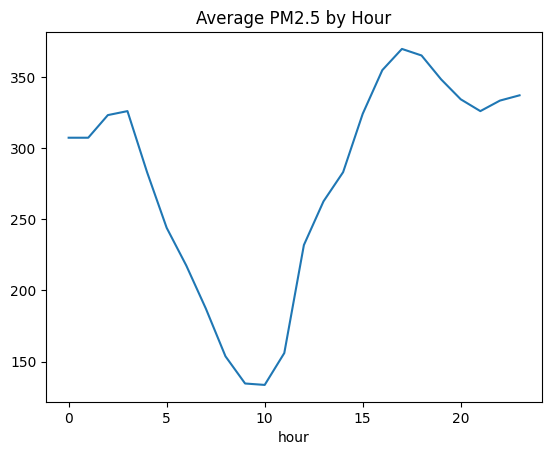

In [9]:
merged_df["datetime"] = pd.to_datetime(merged_df["datetime"], utc=True)
merged_df["hour"] = merged_df["datetime"].dt.hour
hourly_pm = merged_df.groupby("hour")["PM2_5"].max()
hourly_pm.plot(title="Average PM2.5 by Hour")

<Axes: xlabel='month'>

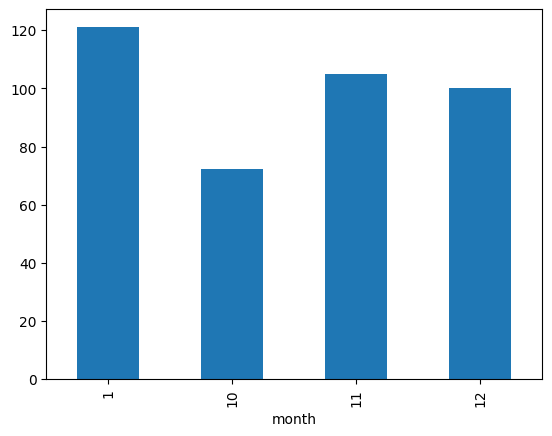

In [10]:
merged_df["month"] = merged_df["datetime"].dt.month
merged_df.groupby("month")["PM2_5"].mean().plot(kind="bar")

In [11]:
high_pm = merged_df[merged_df["PM2_5"] > 250]
low_pm  = merged_df[merged_df["PM2_5"] < 60]

In [12]:
compare = pd.DataFrame({
    "High_PM": high_pm[["WS2M","RH2M","T2M","ALLSKY_SFC_SW_DWN"]].mean(),
    "Low_PM":  low_pm[["WS2M","RH2M","T2M","ALLSKY_SFC_SW_DWN"]].mean()
})

compare

,High_PM,Low_PM
WS2M,0.968942,1.981501
RH2M,54.850096,53.509563
T2M,13.128077,22.867931
ALLSKY_SFC_SW_DWN,30.349615,233.973866


In [13]:
merged_df[
    ["PM2_5","WS2M","RH2M","T2M","ALLSKY_SFC_SW_DWN"]
].corr()["PM2_5"].sort_values()

T2M                 -0.371708
WS2M                -0.365135
ALLSKY_SFC_SW_DWN   -0.293766
RH2M                 0.072939
PM2_5                1.000000
Name: PM2_5, dtype: float64

In [14]:
merged_df["WS2M_lag6"] = merged_df["WS2M"].shift(6)

merged_df[["PM2_5","WS2M","WS2M_lag6"]].corr()["PM2_5"]

PM2_5        1.000000
WS2M        -0.365135
WS2M_lag6   -0.336701
Name: PM2_5, dtype: float64